<a href="https://colab.research.google.com/github/sejin-sim/Hands_On_ML/blob/master/%5B%ED%95%B8%EC%A6%88%EC%98%A8%5D_Chapter4_LR_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 선형 회귀 : 정규 방정식

In [2]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # inv 함수로 역행렬을 계산
theta_best

array([[4.25998318],
       [2.84254993]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.25998318],
       [9.94508305]])

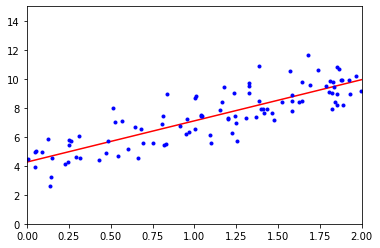

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression # 선형회귀 예측 수행
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)

# intercept : 절편
# coef : 기울기

(array([4.25998318]), array([[2.84254993]]), array([[4.25998318],
        [9.94508305]]))

In [7]:
theta_best_svd, residuals, ranks, s = np.linalg.lstsq(X_b, y, rcond=1e-6) # LR 클래스가 기반으로 하는 함수 : 유사역행렬을 계산
# residuals = (yhat - y)**2, ranks = 행렬의 차원
theta_best_svd # 절편과 기울기를 out

array([[4.25998318],
       [2.84254993]])

In [8]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬 직접 구하는 함수. 절편과 기울기를 out
# 유사역행렬 : 특잇값 분석(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산 된다.

array([[4.25998318],
       [2.84254993]])

* 경사 하상법(GD) : 비용 함수 최소화 위해 반복적 모델 파라미터를 조정
1. 배치 경사 하강법
2. 확률적 경사 하강법 (SGD)
3. 미니 배치 경사 하강법

In [11]:
# 배치 경사 하강법 : 매 경사 하강법 스텝에서 훈련세트 X에 대해서 계산 
eta = 0.1           # 학습률
n_iterations = 1000 # 학습 횟수
m = 100             # 샘플 갯수 (예제 갯수)

theta = np.random.randn(2,1) # 랜덤 초기화

for iteration in range(n_iterations):            # 1000번 반복
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)  # 배치 경사 하강법 식
  theta = theta - eta * gradients                # eta를 곱하면서 조금씩 내려간다.

theta # 정규방정식으로 찾은 것과 정확히 일치한다.

array([[4.25998318],
       [2.84254993]])

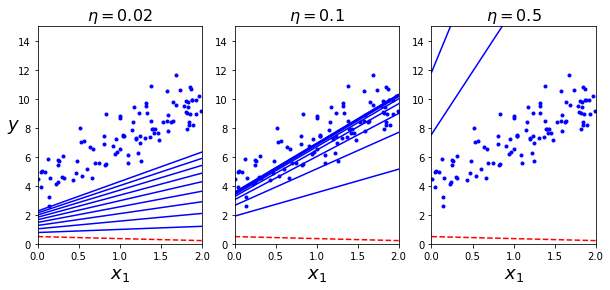

In [14]:
# 여러 학습률에 따른 경사 하강법 그래프

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [15]:
# 배치 경사 하강법의 문제는 매스텝에서 계산한다는 것 = 느림

# 확률적 경사 하강법(SGD) : 매 스탭에서 샘플을 무작위로 선택하고 기울기를 계산
#                      큰 훈련 세트를 훈련 시킬 수 있다.


theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.34958244],
       [2.84608293]])

In [16]:
from sklearn.linear_model import SGDRegressor # 사이킷 런 구현

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# max_iter 최대 1000회 실행
# tol = 0.001 보다 적게 손실 줄어들때까지 실행
# eta0 = 기본 학습 스케줄인 학습률 0.1

sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.2868342]), array([2.88698089]))

In [18]:
# 미니 배치 경사하강법 : 배치와 확률의 중간
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size] # 미니 배치 갯수식
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[4.1824889 ],
       [2.75378724]])

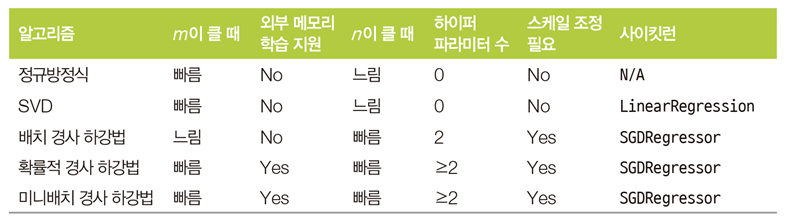